In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [12]:
# CONFIG Matplotlib Parameters
themes = ['default', 'classic', 'bmh', 'dark_background', 'fast']
plt.style.use('classic')                        # theme (use "plt.style.available" method to find out available themes)
plt.rcParams["figure.figsize"] = (17,11.5)      # figure size
plt.rcParams["font.size"] = 10                  # font size
plt.rcParams["text.color"] = "black"            # text color
plt.rcParams["axes.titlesize"] = 16

## For integration we will use the scipy.integrate library. Refer to the documentation at: https://docs.scipy.org/doc/scipy/tutorial/integrate.html

### To compute an approximation of an integral, use the quad function where the inputs are the function and the bounds of integration 

In [3]:
integral = integrate.quad(lambda x: 1/x, 1, 2)

In [4]:
#The output is a tuple=(value_of_integral, upper bound on error)
print(integral)

(0.6931471805599454, 7.695479593116622e-15)


### Note that we are computing the integral of 1/x which is the function ln(x). To see the accuracy of the integration we can use the cumtrapz method which computes the cumulative integration of a certain function. 

In [5]:
x = np.arange(1, 10, 0.01)
f = lambda x: 1/x
y = f(x)
cum = integrate.cumtrapz(y, x, initial=0.1)

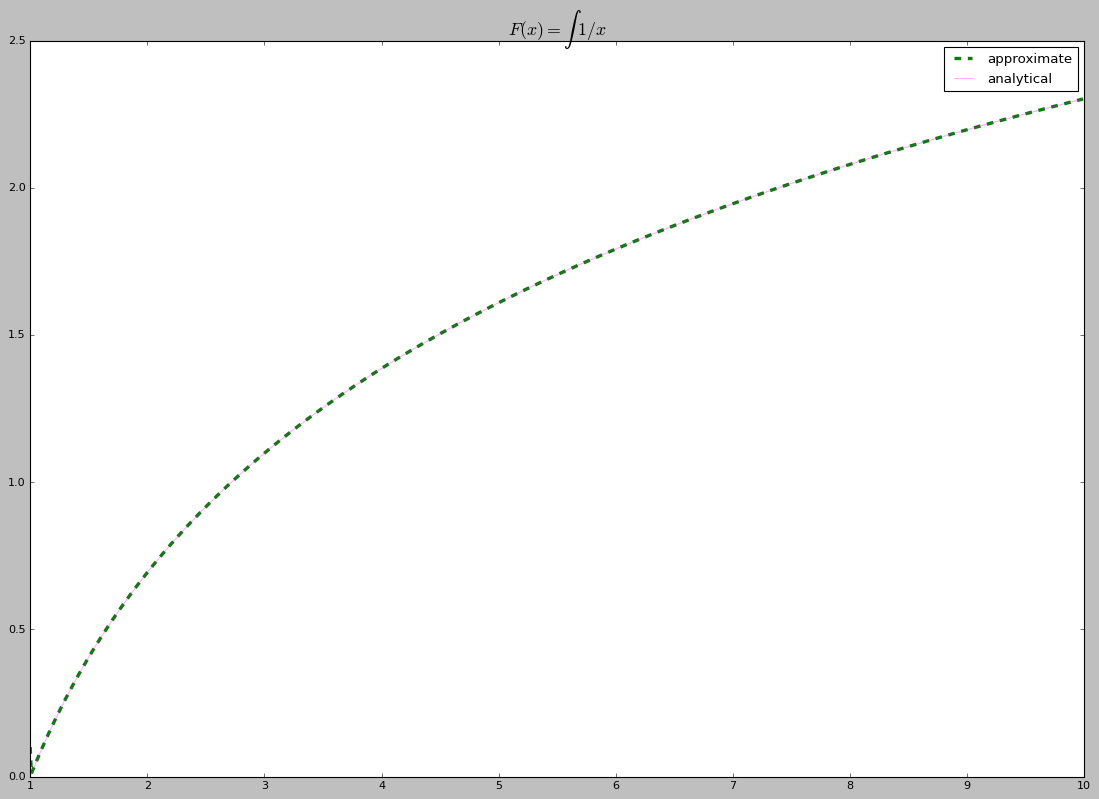

In [13]:
plt.plot(x, cum,'--',color='green', alpha=1, lw=3, label='approximate')
plt.plot(x, np.log(x), color='magenta', alpha=0.3, label='analytical')
plt.title("$F(x) = \int \; 1/x$")
plt.legend()
plt.show()

In [14]:
error = abs(cum-np.log(x))
np.mean(error)

0.00011860643216036509

### As we can see, the error is miniscule for the choice of step size. Recall that the trapezoid method has O(h^2) error. So as we decrease the step-size, the error should improve by order of h^2.

## Gaussian Standard Normal CDF 

In [19]:
f = lambda x: 1/(np.sqrt(2*np.pi))*np.exp(-x**2)
x = np.arange(-2,2,0.0001)
y = f(x)

In [20]:
cum = integrate.cumtrapz(y, x)
analytical = norm.cdf(x)

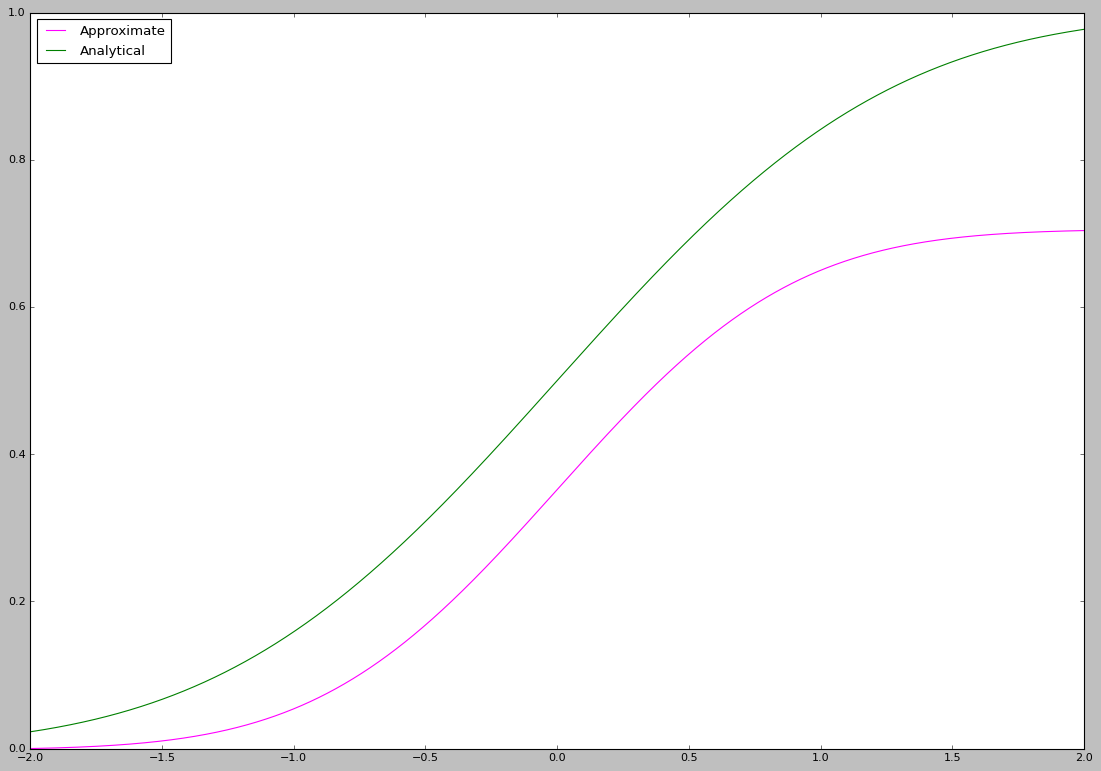

In [21]:
from scipy.stats import norm
plt.plot(x[1::], cum, label='Approximate',color='magenta')
plt.plot(x, analytical, label='Analytical',color='green')
plt.legend(loc='best')
plt.show()

In [22]:
error = np.mean(cum-analytical[1::])

In [23]:
error

-0.14810043849391422